In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv("Fraud_check.csv",encoding="latin1")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
print(df['Undergrad'].value_counts())
print(df['Marital.Status'].value_counts())
print(df["Urban"].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


In [ ]:
df[df['Taxable.Income']<=30000].count()

Undergrad          124
Marital.Status     124
Taxable.Income     124
City.Population    124
Work.Experience    124
Urban              124
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
len(df['Taxable.Income'].unique())

599

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Urban']=le.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,1
1,YES,Divorced,33700,134075,18,1
2,NO,Married,36925,160205,30,1
3,YES,Single,50190,193264,15,1
4,NO,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,1
596,YES,Divorced,69967,55369,2,1
597,NO,Divorced,47334,154058,0,1
598,YES,Married,98592,180083,17,0


In [ ]:
df['Undergrad']=le.fit_transform(df['Undergrad'])
print(df)
df.columns

     Undergrad Marital.Status  Taxable.Income  City.Population  \
0            0         Single           68833            50047   
1            1       Divorced           33700           134075   
2            0        Married           36925           160205   
3            1         Single           50190           193264   
4            0        Married           81002            27533   
..         ...            ...             ...              ...   
595          1       Divorced           76340            39492   
596          1       Divorced           69967            55369   
597          0       Divorced           47334           154058   
598          1        Married           98592           180083   
599          0       Divorced           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
print(df)

     Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..             

In [ ]:
df.loc[df['Taxable.Income']<=30000,'Taxable.Income']=0
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [ ]:
df.loc[df['Taxable.Income']>30000,'Taxable.Income']=1
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [ ]:
x=df.iloc[:,[0,1,3,4,5,]]
y=df.iloc[:,2]
x,y

(     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
 0            0               2            50047               10      1
 1            1               0           134075               18      1
 2            0               1           160205               30      1
 3            1               2           193264               15      1
 4            0               1            27533               28      0
 ..         ...             ...              ...              ...    ...
 595          1               0            39492                7      1
 596          1               0            55369                2      1
 597          0               0           154058                0      1
 598          1               1           180083               17      0
 599          0               0           158137               16      0
 
 [600 rows x 5 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 595    1
 596    1
 597    1
 598   

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)
xtrain

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
3,1,2,193264,15,1
149,0,2,49505,25,0
212,1,0,112659,14,0
585,0,2,137622,2,1
524,1,1,164391,27,0
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [ ]:
ytrain

3      1
149    1
212    1
585    1
524    0
      ..
440    1
165    1
7      1
219    0
326    0
Name: Taxable.Income, Length: 420, dtype: int64

In [ ]:
xtest

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
221,1,2,134135,14,0
390,1,2,57324,17,0
530,1,0,194421,17,1
232,1,1,150349,2,0


In [ ]:
ytest

159    1
307    1
253    1
528    1
137    0
      ..
221    1
390    1
530    1
232    0
139    1
Name: Taxable.Income, Length: 180, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [ ]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
ypred=model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.78      0.99      0.87       140

    accuracy                           0.77       180
   macro avg       0.39      0.49      0.43       180
weighted avg       0.60      0.77      0.68       180



In [ ]:
model.score(xtrain,ytrain)

0.8238095238095238

In [ ]:
from sklearn import tree

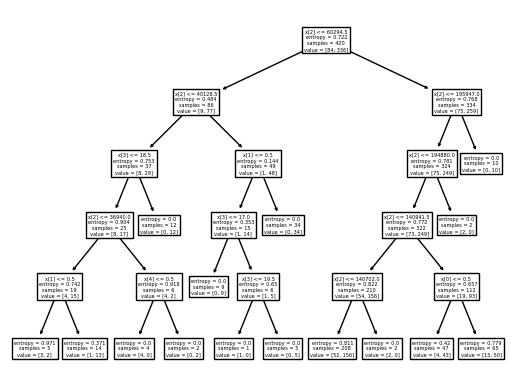

<Figure size 9600x7200 with 0 Axes>

In [ ]:
tree.plot_tree(model)
plt.figure(dpi=1500)
plt.show()

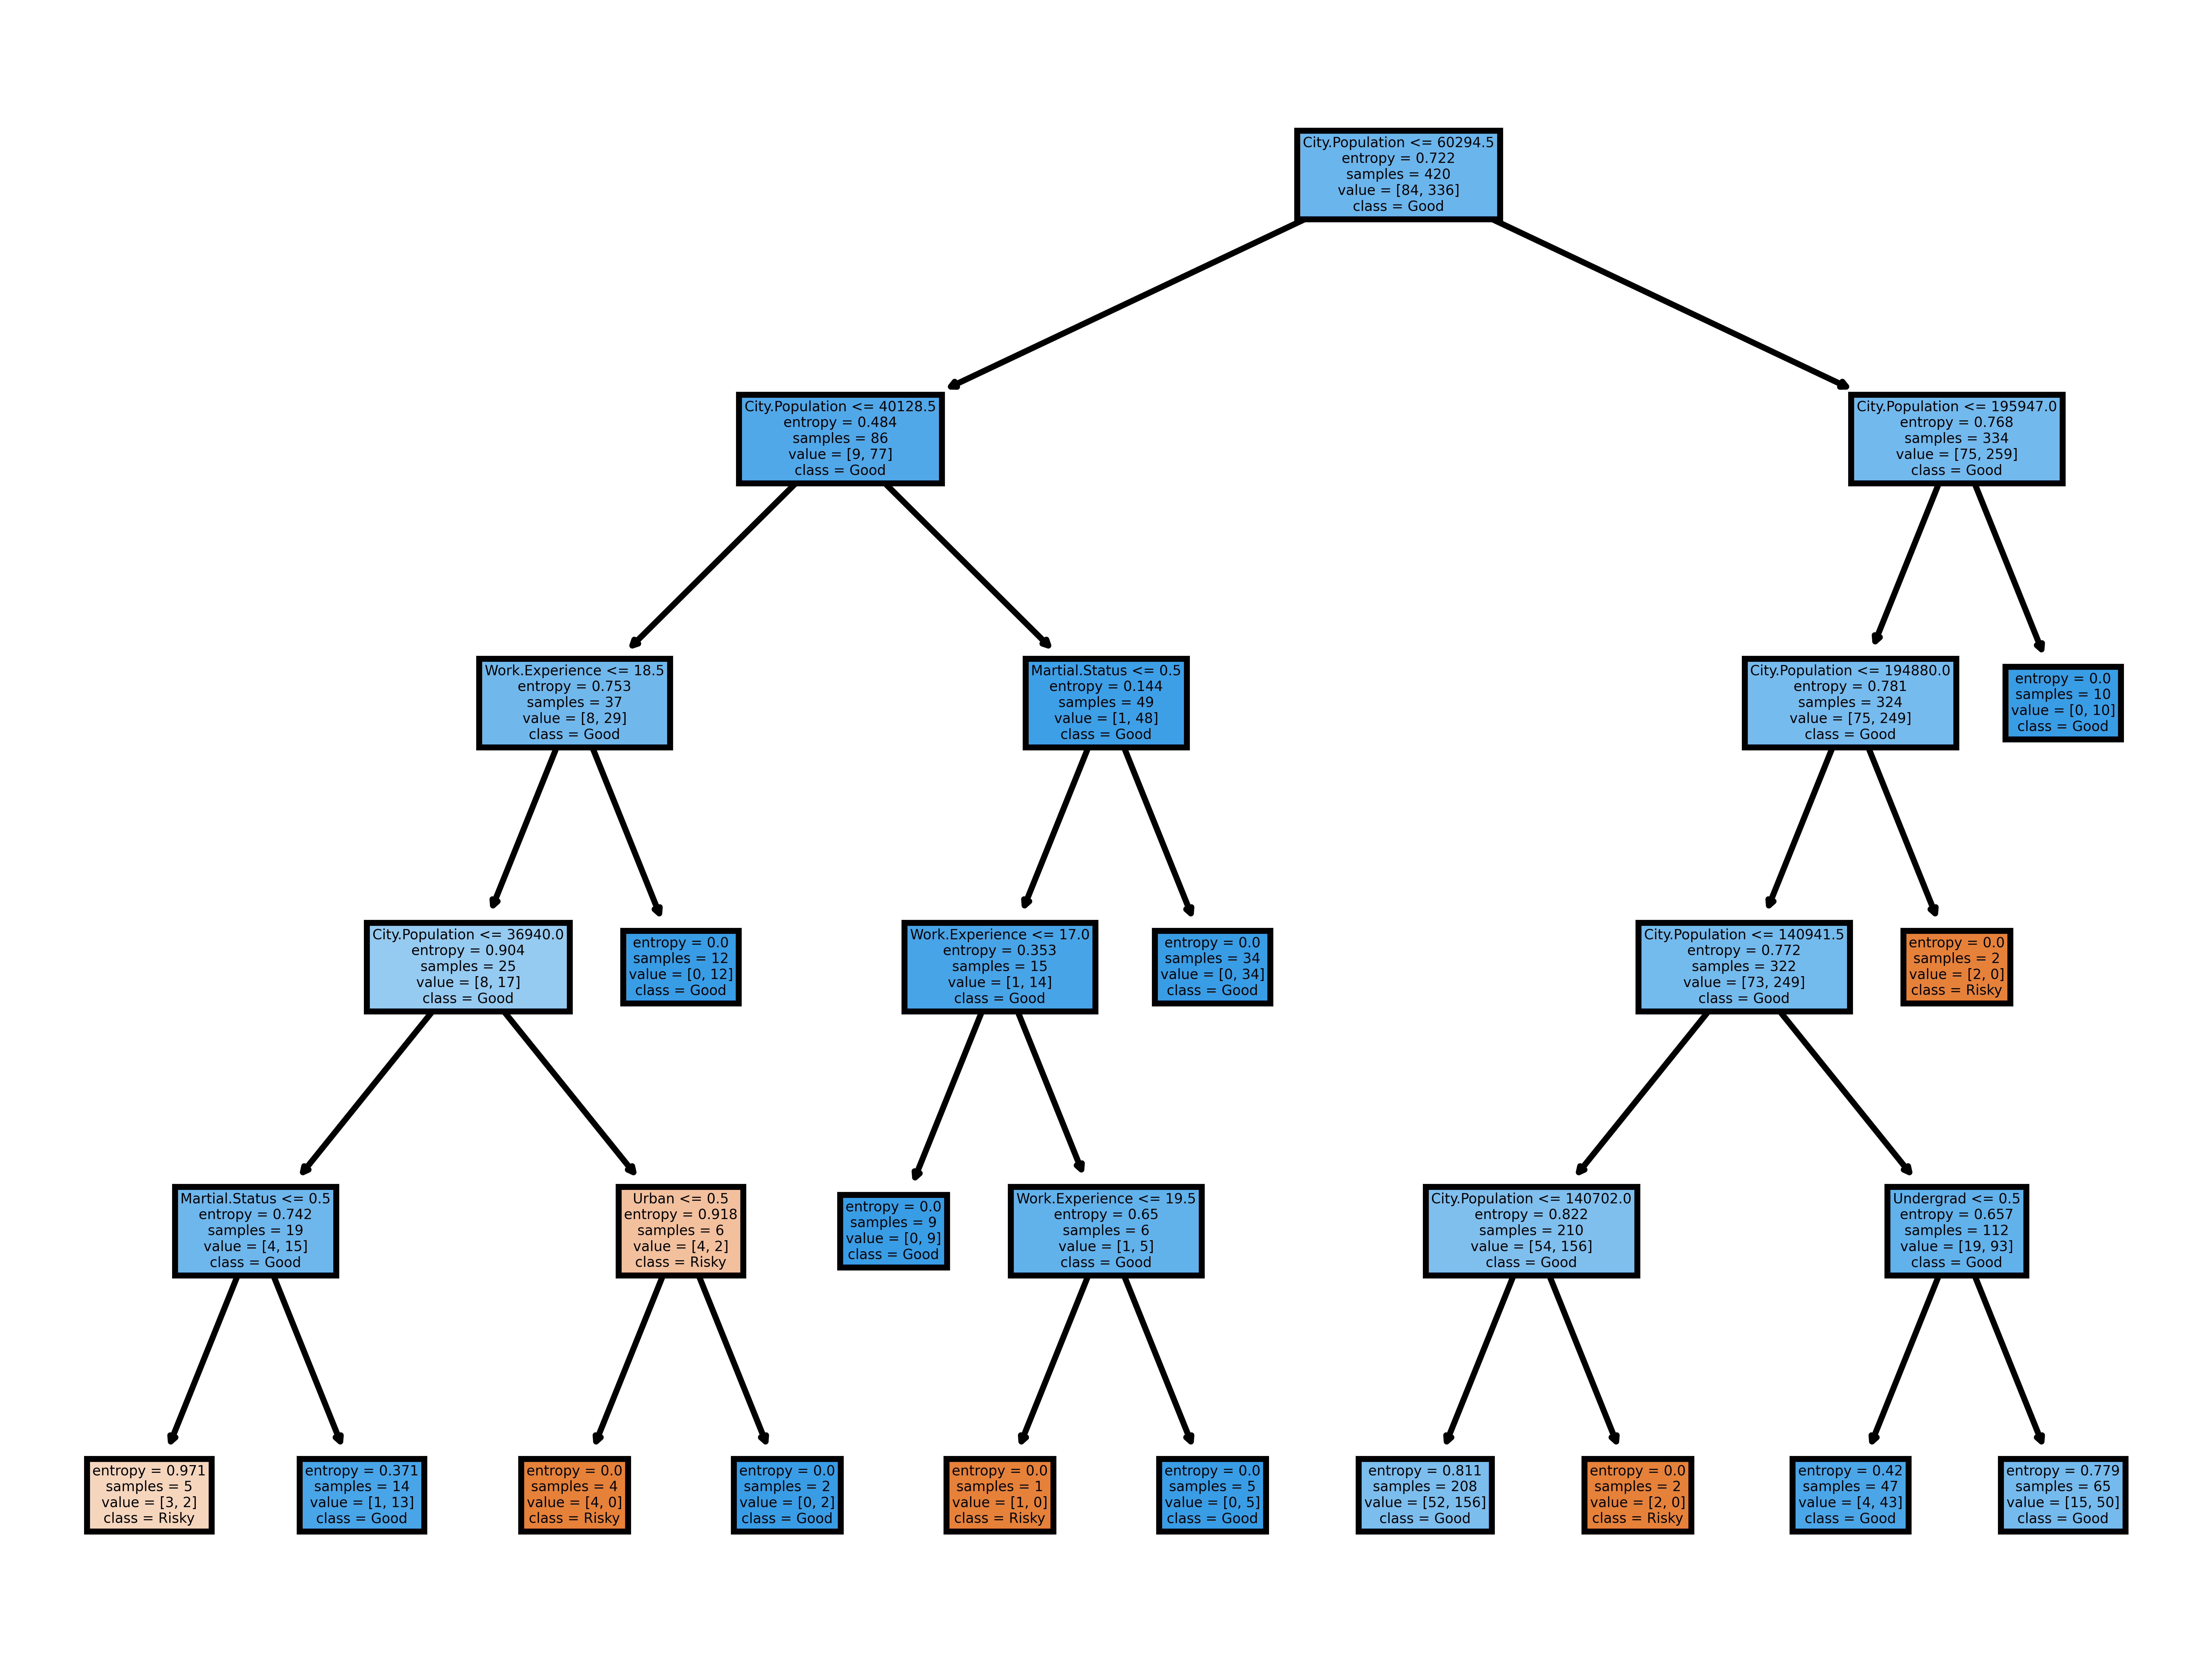

In [ ]:
fn=['Undergrad',"Martial.Status","City.Population","Work.Experience","Urban"]
cn=['Risky',"Good"]
plt.figure(dpi=1500)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
